In [1]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import scipy.stats as stats
import soundfile as sf
import warnings
import time
warnings.filterwarnings('ignore')

In [2]:
# Directories for audio files
FAKE_DIR = '/kaggle/input/audio-dataset/AUDIO/FAKE/'
REAL_DIR = '/kaggle/input/audio-dataset/AUDIO/REAL/'

In [3]:
# Dictionary to store audio files organized by speaker
audio_files_dict = {}

# Function to collect audio files
def collect_audio_files(real_dir, fake_dir):
    # Collect original audio files
    for filename in os.listdir(real_dir):
        if filename.endswith('-original.wav'):
            speaker_name = filename.split('-')[0]  # Get speaker's name
            original_path = os.path.join(real_dir, filename)
            # Initialize dictionary for the speaker if not exists
            if speaker_name not in audio_files_dict:
                audio_files_dict[speaker_name] = {'original': [], 'transformed': []}
            audio_files_dict[speaker_name]['original'].append(original_path)

    # Collect transformed audio files
    for filename in os.listdir(fake_dir):
        if '-to-' in filename:
            speaker_name = filename.split('-')[0]  # Get source speaker's name
            transformed_path = os.path.join(fake_dir, filename)
            # Check if the speaker exists in the dictionary
            if speaker_name in audio_files_dict:
                audio_files_dict[speaker_name]['transformed'].append(transformed_path)

# Call the function to collect audio files
collect_audio_files(REAL_DIR, FAKE_DIR)

# Display collected audio files
for speaker, files in audio_files_dict.items():
    print(f"Speaker: {speaker}")
    print("Original Audio Files:")
    for original in files['original']:
        print(f"  {original}")
    print("Transformed Audio Files:")
    for transformed in files['transformed']:
        print(f"  {transformed}")

Speaker: biden
Original Audio Files:
  /kaggle/input/audio-dataset/AUDIO/REAL/biden-original.wav
Transformed Audio Files:
  /kaggle/input/audio-dataset/AUDIO/FAKE/biden-to-margot.wav
  /kaggle/input/audio-dataset/AUDIO/FAKE/biden-to-linus.wav
  /kaggle/input/audio-dataset/AUDIO/FAKE/biden-to-Trump.wav
  /kaggle/input/audio-dataset/AUDIO/FAKE/biden-to-ryan.wav
  /kaggle/input/audio-dataset/AUDIO/FAKE/biden-to-musk.wav
  /kaggle/input/audio-dataset/AUDIO/FAKE/biden-to-Obama.wav
  /kaggle/input/audio-dataset/AUDIO/FAKE/biden-to-taylor.wav
Speaker: trump
Original Audio Files:
  /kaggle/input/audio-dataset/AUDIO/REAL/trump-original.wav
Transformed Audio Files:
  /kaggle/input/audio-dataset/AUDIO/FAKE/trump-to-Obama.wav
  /kaggle/input/audio-dataset/AUDIO/FAKE/trump-to-musk.wav
  /kaggle/input/audio-dataset/AUDIO/FAKE/trump-to-Biden.wav
  /kaggle/input/audio-dataset/AUDIO/FAKE/trump-to-taylor.wav
  /kaggle/input/audio-dataset/AUDIO/FAKE/trump-to-margot.wav
  /kaggle/input/audio-dataset/AUDIO

In [4]:
for speaker, files in audio_files_dict.items():
        original_files = files['original']
        transformed_files = files['transformed']
        
        files['original'] = original_files * len(transformed_files)
        print(len(files['original']),len(transformed_files))
        
#print(audio_files_dict)
        
        

7 7
7 7
7 7
5 5
7 7
7 7
7 7
7 7


In [5]:
def extract_basic_features(audio_files_dict):
    summary_metrics = []
    
    for speaker, files in audio_files_dict.items():
        original_files = files['original']
        transformed_files = files['transformed']
        
        # Loop through each original and transformed file pair
        for original, transformed in zip(original_files, transformed_files):
            # Load original audio data
            original_audio, sr_original = librosa.load(original, sr=None)
            duration_original = librosa.get_duration(y=original_audio, sr=sr_original)
            silence_original = librosa.effects.split(original_audio, top_db=20)
            num_silences_original = len(silence_original)
            mean_original = np.mean(original_audio)
            variance_original = np.var(original_audio)
            skewness_original = stats.skew(original_audio)
            kurtosis_original = stats.kurtosis(original_audio)

            # Append original file metrics
            summary_metrics.append({
                'Speaker': speaker,
                'File Type': 'Original',
                'Transformed Speaker': 'NA',
                'Duration (s)': duration_original,
                'Num Silences': num_silences_original,
                'Sampling Rate': sr_original,
                'Mean': mean_original,
                'Variance': variance_original,
                'Skewness': skewness_original,
                'Kurtosis': kurtosis_original
            })

            # Load transformed audio data
            transformed_audio, sr_transformed = librosa.load(transformed, sr=None)
            duration_transformed = librosa.get_duration(y=transformed_audio, sr=sr_transformed)
            silence_transformed = librosa.effects.split(transformed_audio, top_db=20)
            num_silences_transformed = len(silence_transformed)
            mean_transformed = np.mean(transformed_audio)
            variance_transformed = np.var(transformed_audio)
            skewness_transformed = stats.skew(transformed_audio)
            kurtosis_transformed = stats.kurtosis(transformed_audio)

            # Extract original and transformed speaker names from filename
            transformed_filename = transformed.split('/')[-1]
            original_speaker, transformed_speaker = transformed_filename.split('-to-')

            # Append transformed file metrics
            summary_metrics.append({
                'Speaker': original_speaker,
                'File Type': 'Transformed',
                'Transformed Speaker': transformed_speaker.replace('.wav', ''),
                'Duration (s)': duration_transformed,
                'Num Silences': num_silences_transformed,
                'Sampling Rate': sr_transformed,
                'Mean': mean_transformed,
                'Variance': variance_transformed,
                'Skewness': skewness_transformed,
                'Kurtosis': kurtosis_transformed
            })

    # Return a DataFrame where each row is either an original or transformed audio file
    return pd.DataFrame(summary_metrics)

In [22]:
# Perform EDA
start_time = time.time()

# Your code here
summary_metrics = extract_basic_features(audio_files_dict)

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")


Execution time: 312.31632351875305 seconds


In [23]:
summary_metrics.dtypes

Speaker                 object
File Type               object
Transformed Speaker     object
Duration (s)           float64
Num Silences             int64
Sampling Rate            int64
Mean                   float32
Variance               float32
Skewness               float64
Kurtosis               float64
dtype: object

In [24]:
summary_metrics.head()


,Speaker,File Type,Transformed Speaker,Duration (s),Num Silences,Sampling Rate,Mean,Variance,Skewness,Kurtosis
0,biden,Original,NA,600.002979,577,48000,-0.000001,0.002640,0.265638,3.785235
1,biden,Transformed,margot,600.000000,982,44100,0.000711,0.019278,-0.140103,5.573927
2,biden,Original,NA,600.002979,577,48000,-0.000001,0.002640,0.265638,3.785235
3,biden,Transformed,linus,600.000000,980,44100,0.000238,0.012277,1.047354,8.199164
4,biden,Original,NA,600.002979,577,48000,-0.000001,0.002640,0.265638,3.785235


In [25]:
summary_metrics.drop_duplicates(inplace=True)

['Duration (s)', 'Num Silences', 'Sampling Rate', 'Mean', 'Variance', 'Skewness', 'Kurtosis']
['Speaker', 'Transformed Speaker']


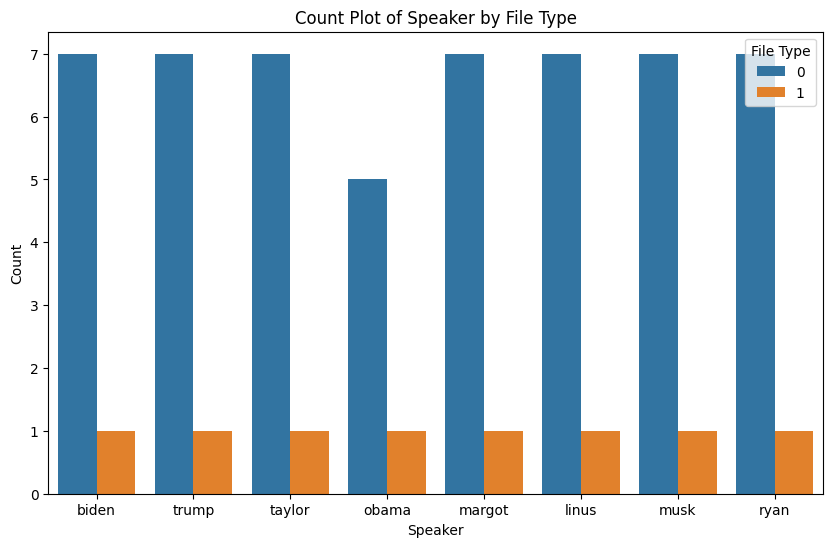

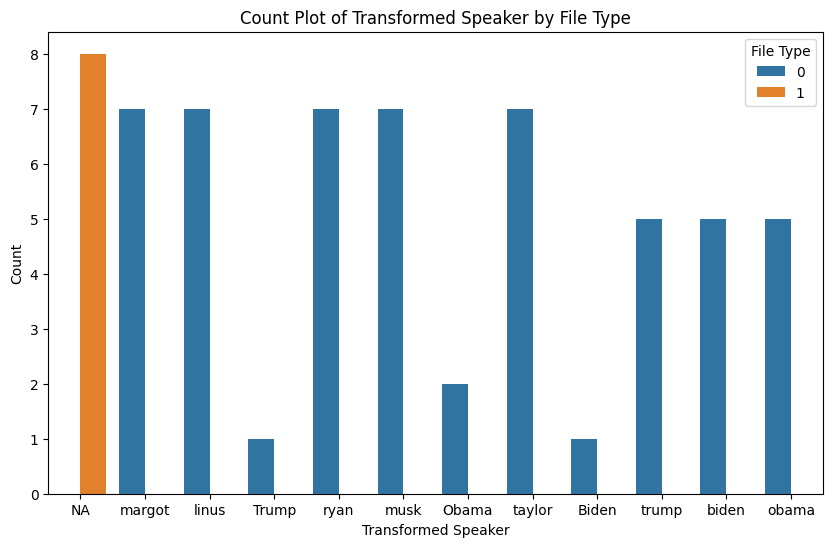

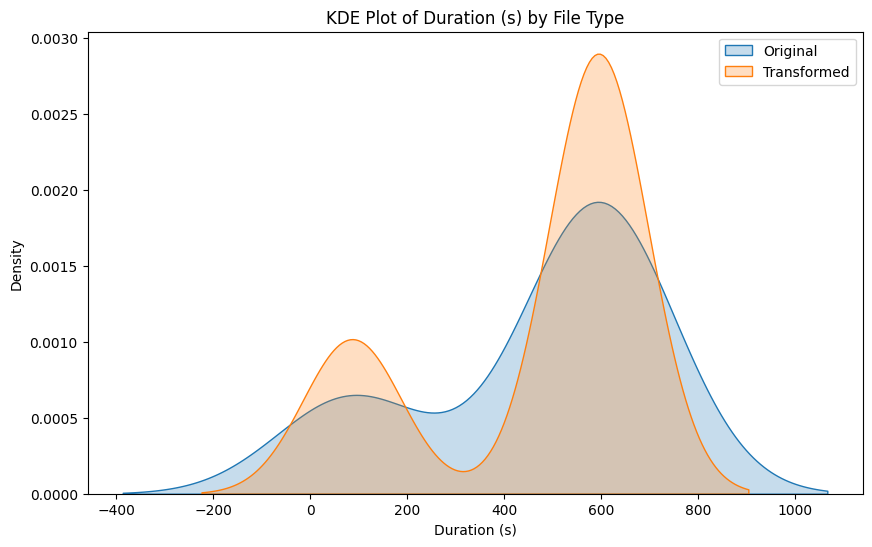

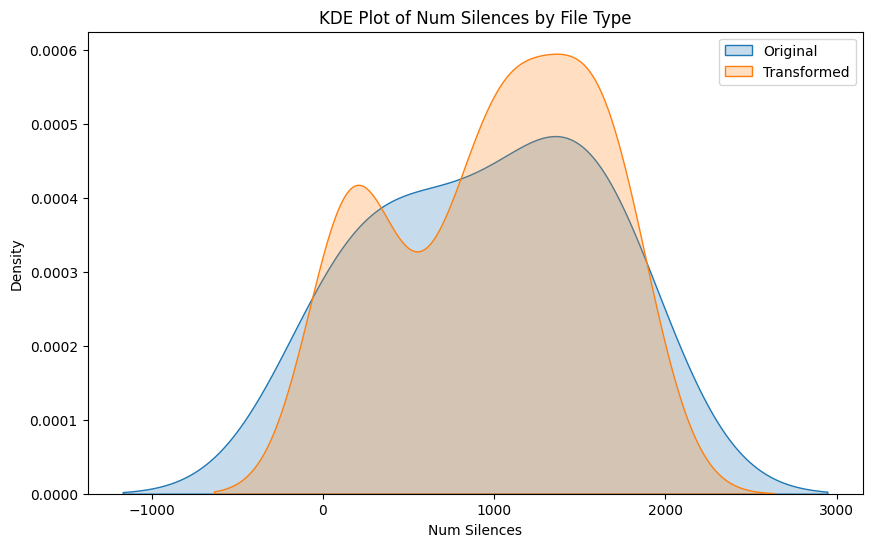

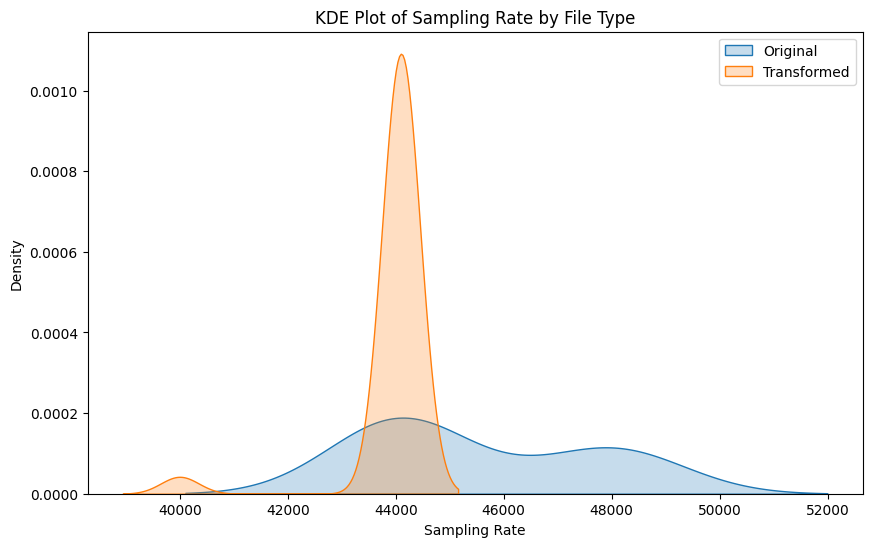

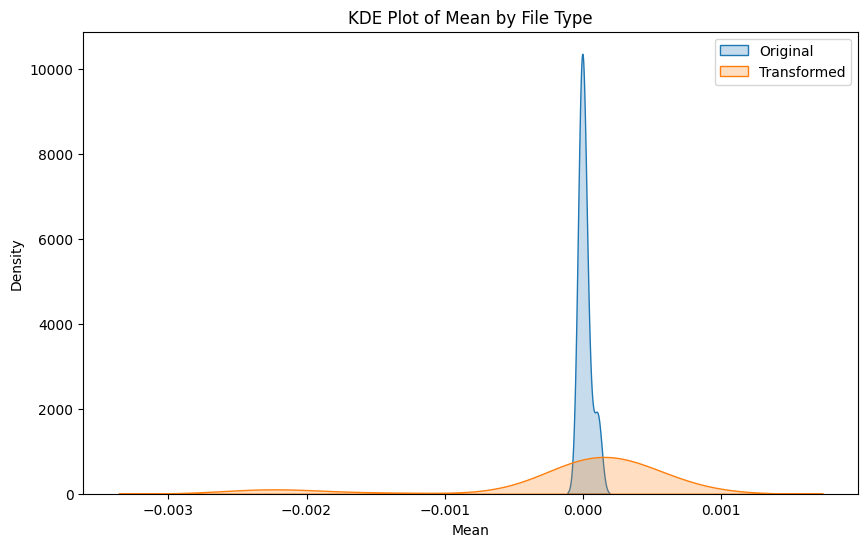

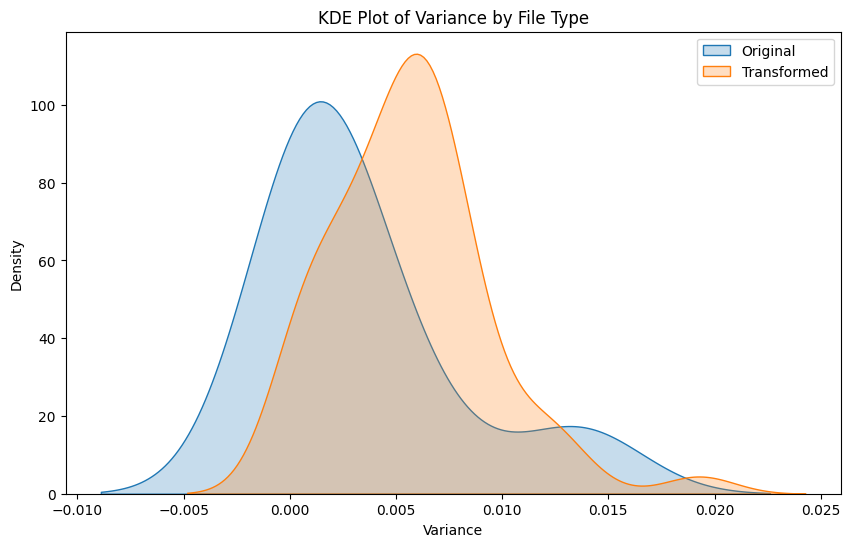

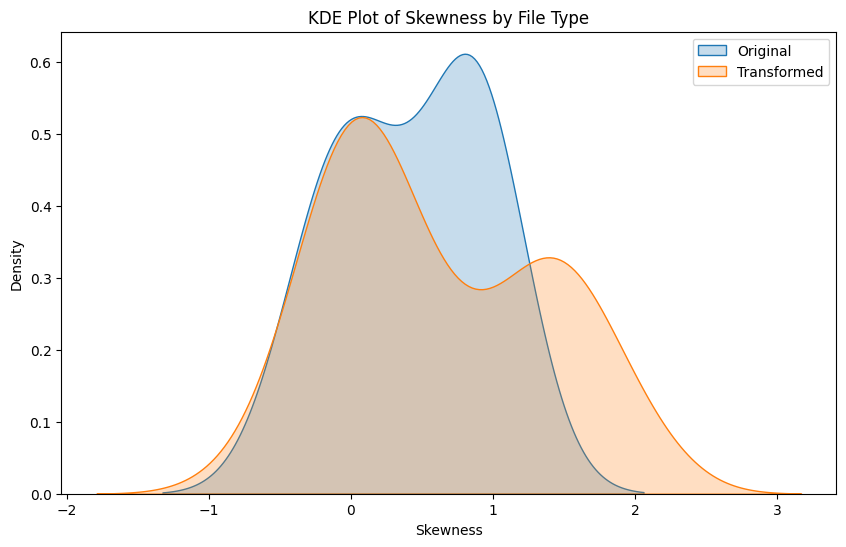

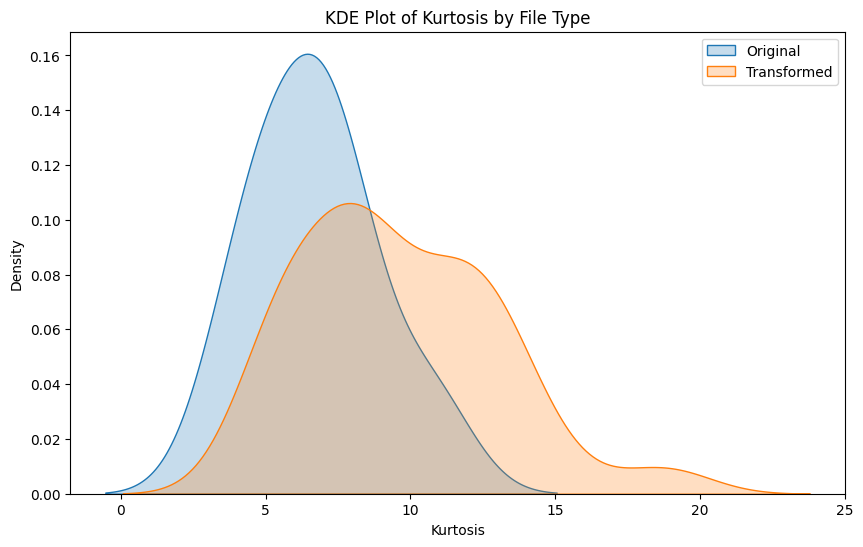

In [26]:

#Assuming df is the DataFrame containing the summary_metrics
#Add the 'File Type' column for easy comparison
#Convert 'File Type' column to binary: 1 for Original, 0 for Transformed
summary_metrics['File Type'] = summary_metrics.apply(lambda row: 1 if row['File Type'] == 'Original' else 0, axis=1)


# Separate categorical (object type) and numerical features
categorical_features = summary_metrics.select_dtypes(include='object').columns.tolist()
numerical_features = summary_metrics.select_dtypes(exclude='object').columns.tolist()

# Remove 'File Type' from numerical features if it gets selected
if 'File Type' in numerical_features:
    numerical_features.remove('File Type')
    
print(numerical_features)
print(categorical_features)

# Bar plot for categorical features
def bar_plot_categorical_features(summary_metrics, categorical_features):
    for feature in categorical_features:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=feature, hue='File Type', data=summary_metrics)
        plt.title(f'Count Plot of {feature} by File Type')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.legend(title='File Type')
        plt.show()

# KDE plot for numerical features
def kde_plot_numerical_features(summary_metrics, numerical_features):
    for feature in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(summary_metrics[summary_metrics['File Type'] == 1][feature], label='Original', shade=True)
        sns.kdeplot(summary_metrics[summary_metrics['File Type'] == 0][feature], label='Transformed', shade=True)
        plt.title(f'KDE Plot of {feature} by File Type')
        plt.xlabel(f'{feature}')
        plt.ylabel('Density')
        plt.legend()
        plt.show()

# Call the plotting functions
bar_plot_categorical_features(summary_metrics, categorical_features)
kde_plot_numerical_features(summary_metrics, numerical_features)

**Observations** 
* Based on the plot, numerical features like variance and kurtosis seem particularly effective in distinguishing between original and fake audio, showing strong potential for separation.

In [27]:
#saving dataframe for further analysis
summary_metrics.to_csv('summary_metrics.csv')

In [29]:
summary_metrics.columns

Index(['Speaker', 'File Type', 'Transformed Speaker', 'Duration (s)',
       'Num Silences', 'Sampling Rate', 'Mean', 'Variance', 'Skewness',
       'Kurtosis'],
      dtype='object')

In [28]:
summary_metrics.head()

,Speaker,File Type,Transformed Speaker,Duration (s),Num Silences,Sampling Rate,Mean,Variance,Skewness,Kurtosis
0,biden,1,NA,600.002979,577,48000,-0.000001,0.002640,0.265638,3.785235
1,biden,0,margot,600.000000,982,44100,0.000711,0.019278,-0.140103,5.573927
3,biden,0,linus,600.000000,980,44100,0.000238,0.012277,1.047354,8.199164
5,biden,0,Trump,600.000000,890,40000,0.000005,0.004901,0.585405,6.040788
7,biden,0,ryan,600.000000,1058,44100,-0.000087,0.011838,0.007454,6.208146


In [6]:
original_audio, sr = librosa.load('/kaggle/input/audio-dataset/AUDIO/REAL/obama-original.wav', sr=None)
fake_audio, sr = librosa.load('/kaggle/input/audio-dataset/AUDIO/FAKE/Obama-to-Biden.wav', sr=None)

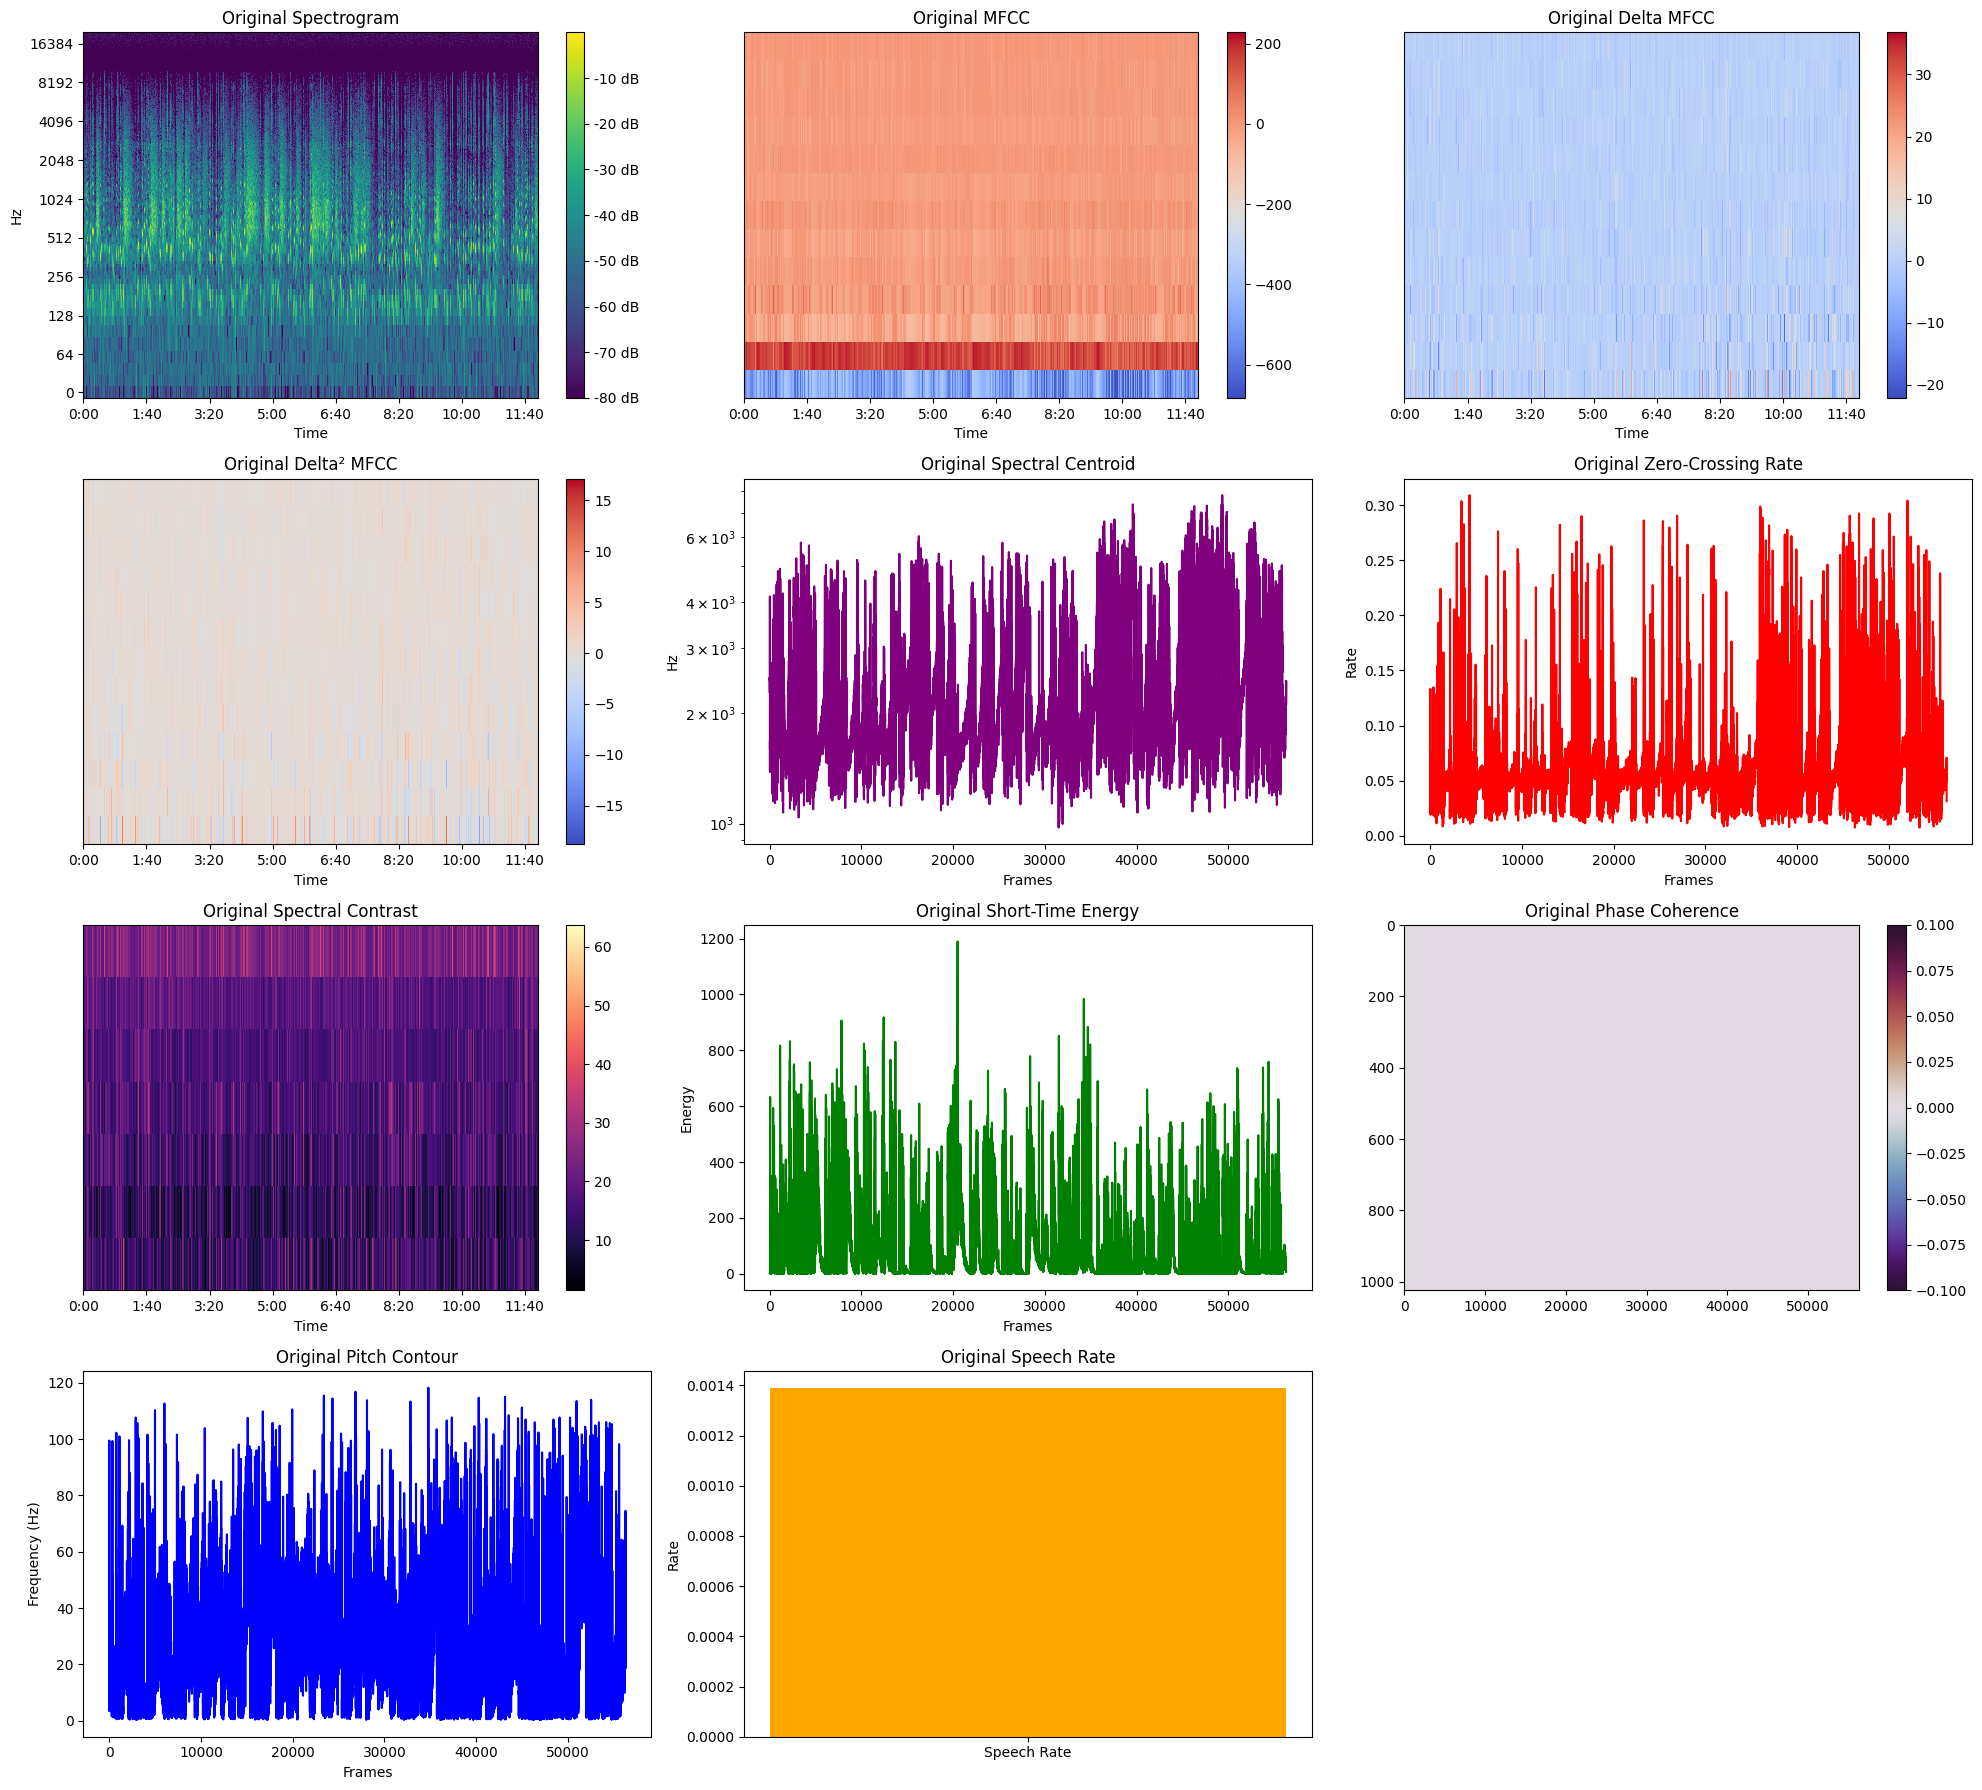

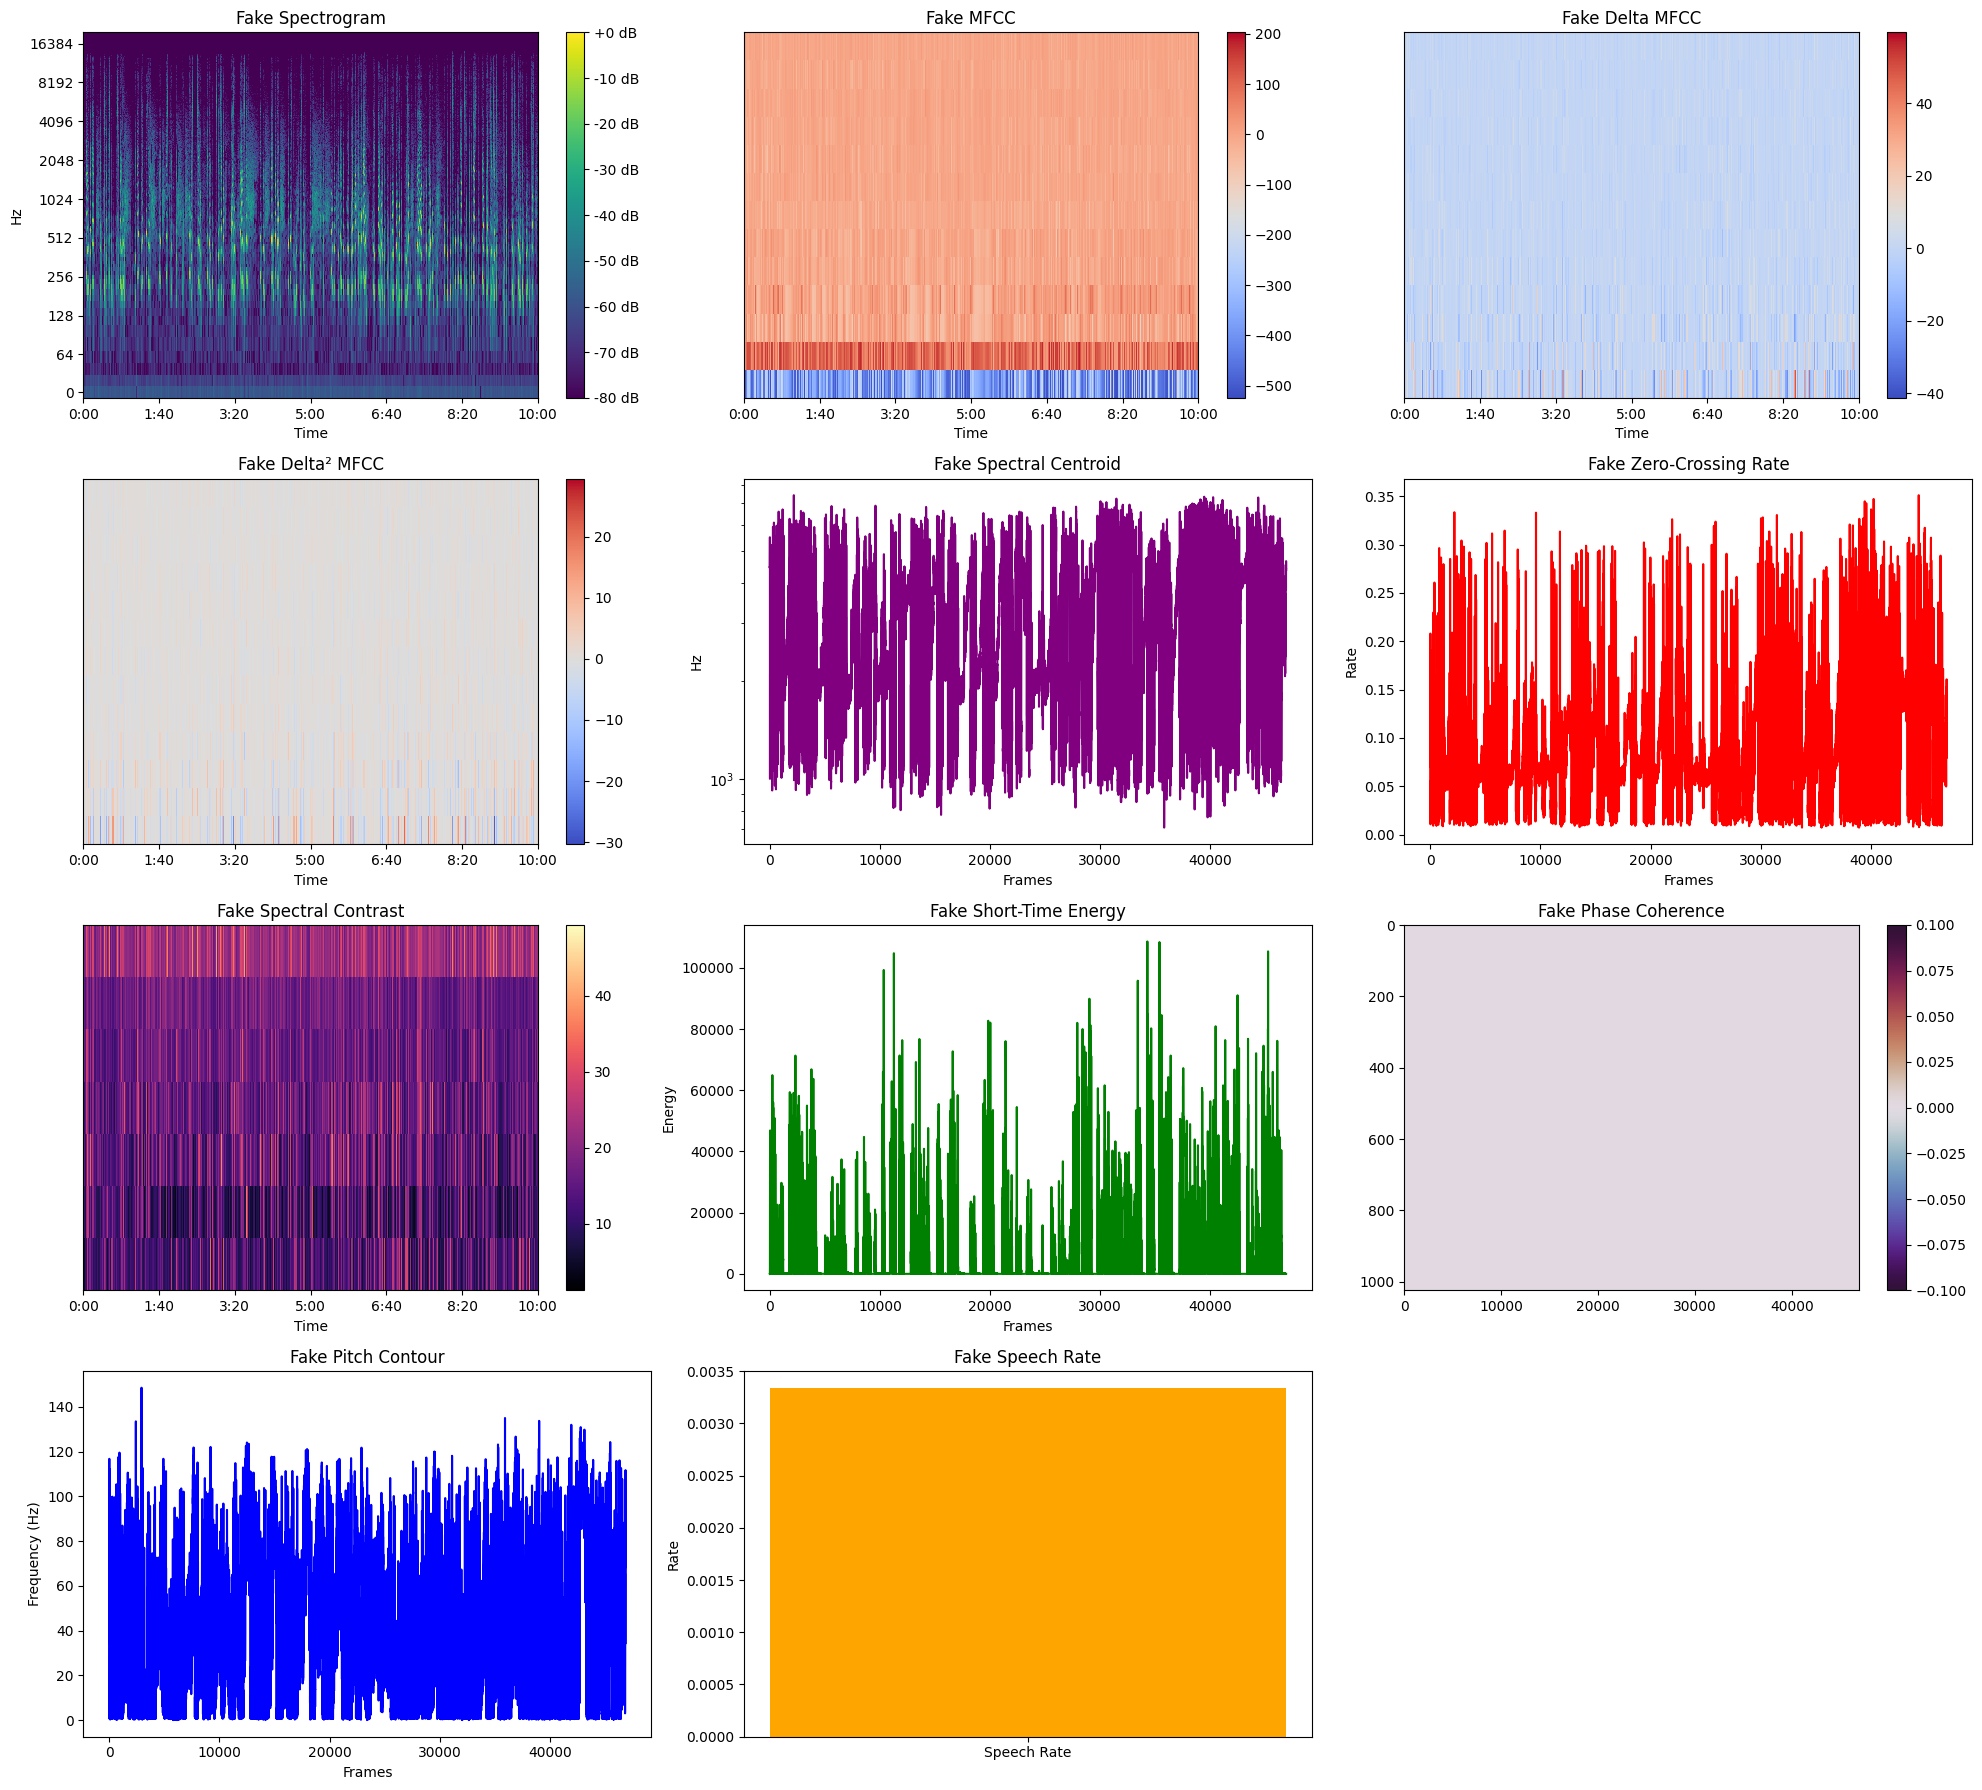

In [7]:

def plot_audio_features(audio, sr, title_prefix):
    # Calculate features
    stft = np.abs(librosa.stft(audio))  # Short-Time Fourier Transform
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)  # MFCC
    delta_mfcc = librosa.feature.delta(mfcc)  # Delta MFCC
    delta2_mfcc = librosa.feature.delta(mfcc, order=2)  # Delta² MFCC
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)  # Spectral Centroid
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio)  # Zero-Crossing Rate
    spectral_contrast = librosa.feature.spectral_contrast(S=stft, sr=sr)  # Spectral Contrast
    short_time_energy = np.sum(stft**2, axis=0)  # Short-Time Energy
    phase_coherence = np.angle(stft)  # Phase Coherence (as a placeholder for visualization)
    pitch_contour, _ = librosa.piptrack(y=audio, sr=sr)  # Pitch Contour
    speech_rate = len(librosa.effects.split(audio)) / (len(audio) / sr)  # Speech Rate

    # Plot features
    plt.figure(figsize=(20, 18))

    # 1. Spectrogram
    plt.subplot(4, 3, 1)
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'{title_prefix} Spectrogram')

    # 2. MFCC
    plt.subplot(4, 3, 2)
    librosa.display.specshow(mfcc, x_axis='time', sr=sr, cmap='coolwarm')
    plt.colorbar()
    plt.title(f'{title_prefix} MFCC')

    # 3. Delta MFCC
    plt.subplot(4, 3, 3)
    librosa.display.specshow(delta_mfcc, x_axis='time', sr=sr, cmap='coolwarm')
    plt.colorbar()
    plt.title(f'{title_prefix} Delta MFCC')

    # 4. Delta² MFCC
    plt.subplot(4, 3, 4)
    librosa.display.specshow(delta2_mfcc, x_axis='time', sr=sr, cmap='coolwarm')
    plt.colorbar()
    plt.title(f'{title_prefix} Delta² MFCC')

    # 5. Spectral Centroid
    plt.subplot(4, 3, 5)
    plt.semilogy(spectral_centroid.T, label='Spectral Centroid', color='purple')
    plt.xlabel('Frames')
    plt.ylabel('Hz')
    plt.title(f'{title_prefix} Spectral Centroid')

    # 6. Zero-Crossing Rate
    plt.subplot(4, 3, 6)
    plt.plot(zero_crossing_rate[0], color='red')
    plt.xlabel('Frames')
    plt.ylabel('Rate')
    plt.title(f'{title_prefix} Zero-Crossing Rate')

    # 7. Spectral Contrast
    plt.subplot(4, 3, 7)
    librosa.display.specshow(spectral_contrast, x_axis='time', sr=sr, cmap='magma')
    plt.colorbar()
    plt.title(f'{title_prefix} Spectral Contrast')

    # 8. Short-Time Energy
    plt.subplot(4, 3, 8)
    plt.plot(short_time_energy, color='green')
    plt.xlabel('Frames')
    plt.ylabel('Energy')
    plt.title(f'{title_prefix} Short-Time Energy')

    # 9. Phase Coherence (Visualized as an Angle Map)
    plt.subplot(4, 3, 9)
    plt.imshow(phase_coherence, aspect='auto', cmap='twilight_shifted')
    plt.colorbar()
    plt.title(f'{title_prefix} Phase Coherence')

    # 10. Pitch Contour
    plt.subplot(4, 3, 10)
    plt.plot(np.mean(pitch_contour, axis=0), color='blue')
    plt.xlabel('Frames')
    plt.ylabel('Frequency (Hz)')
    plt.title(f'{title_prefix} Pitch Contour')

    # 11. Speech Rate
    plt.subplot(4, 3, 11)
    plt.bar(1, speech_rate, color='orange')
    plt.xticks([1], ['Speech Rate'])
    plt.ylabel('Rate')
    plt.title(f'{title_prefix} Speech Rate')

    plt.tight_layout()
    plt.show()

# Example Usage:
# Plot features for Original Audio
plot_audio_features(original_audio, sr, title_prefix="Original")

# Plot features for Fake Audio
plot_audio_features(fake_audio, sr, title_prefix="Fake")
